# Numerische Nullstellensuche
## Hintergrund

Bei der Modellierung und Optimierung von Systemen stoßen wir unweigerlich auf Probleme der Form 

_Für welchen Wert von x ergibt meine Gleichung den gewünschten Wert y_

oder

$$f(x) = y$$

Für $y=0$ sprechen wir von der Normalform einer Gleichung. Für einfache Gleichungen dieser Art kennt die Mathematik analytische Verfahren zur Nullstellensuche, etwa für

$$x^2 + px + q = 0$$

die von $p$ sowie $q$ abhängigen Lösungen

$$x_\mathrm{1,2}-\frac{p}{2} \pm \sqrt{ \left( \frac{p}{2} \right)^2 - q }$$

Ähnliche (bedeutend kompliziertere) Formeln existieren für Gleichungen dritter und vierter Potenz, doch bereits für eine Gleichung wie

$$x^5−x^3+3x−5=0$$

gibt es keine allgemeine Lösungsformel mehr. Noch schlimmer sind _transzendente Gleichungen_, also Gleichungen, wie Funktionen wie den Sinus oder die Exponentialfunktion beinhalten:

$$\cos x - x = 0$$

In all diesen Fällen helfen uns numerische Verfahren.

## Wo liegt meine Nullstelle?

Die hier verwendeten numerischen Verfahren müssen mit einem oder zwei Werten in der Nähe der gesuchten Nullstelle initialisiert werden. Eine Nullstellensuche beginnt daher gerne mit einer Visualisierung der Funktion, für die eine Nullstelle gefunden werden soll:

In [2]:
import matplotlib.pyplot as plt
import numpy as np

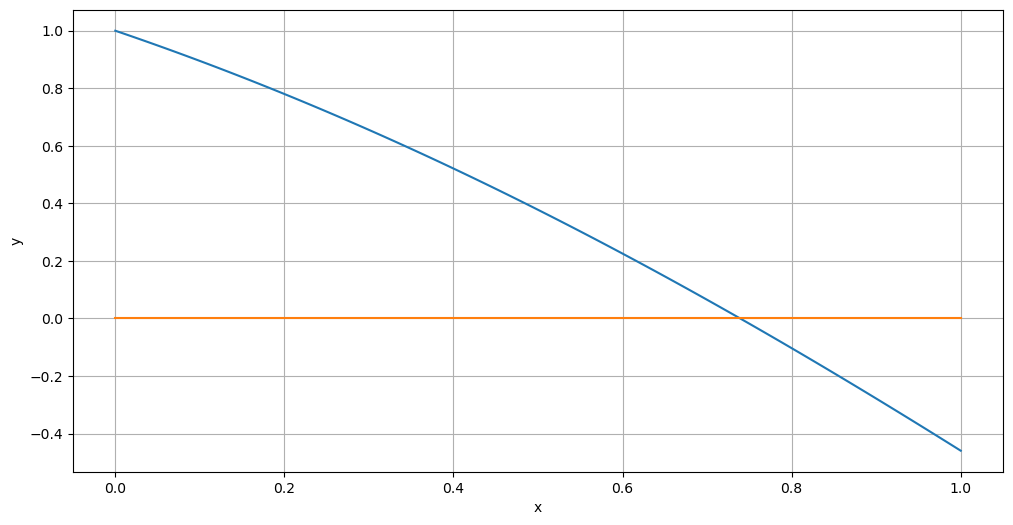

In [3]:
def g(x):
    return np.cos(x)-x

x = np.linspace(0,1,100)
fx = g(x)

fig = plt.figure(figsize=(12,6))
plt.plot(x,fx)
plt.plot(x,np.zeros_like(x))
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

Die gesuchte Nullstelle liegt offensichtlich irgendwo zwischen 0,7 und 0,8. Für eine genauere Lösung wenden wir nun drei verschiedene numerische Verfahren an: Die Fixpunktiteration, das Bisektionsverfahren sowie das Newton-Verfahren.

## Fixpunktiteration

Für die Fixpunkt iteration müssen wir unsere Gleichung in der Normalform zunächst in die Fixpunktform

$$g(x) = x$$

überführen. Im obigen Beispiel wäre dies

$$\cos x = x$$

daher gilt $g(x) = \cos x$. Wir implementieren dies als Python-Funktion: 

In [4]:
def g(x):
    return np.cos(x)

def nullstelle_fix(g, x0, eps, *args):
    x = x0
    imax = 100
    for i in range(imax):
        x_next = g(x, *args)
        if np.abs(x_next - x) < eps:
            return x_next, i
        x = x_next

Gehen wir nun auf Nullstellenjagd:

In [5]:
x0 = 0.7
eps = 1.e-6

print(f"Nullstelle von g mit einer Genauigkeit {eps:.1e}:", nullstelle_fix(g,x0,eps))

Nullstelle von g mit einer Genauigkeit 1.0e-06: (0.7390848589216623, 29)


## Bisektionsverfahren

Das Bisektionsverfahren ist deutlich aufwendiger in der Implementierung und benötigt zwei Startwerte: Einen Wert links von der Nullstelle, einen Wert rechts von der Nullstelle. Doch dafür können wir direkt die zu lösende Gleichung bzw. Funktion verwenden und müssen keinerlei Umformungen vornehmen. Eine Implementation des in der Vorlesung vorgestellten Verfahrens könnte so aussehen:

In [6]:
def nullstelle_bis(f, xl, xr, eps, *args):
    """
    Bestimme die Nullstelle einer Funktion mit Hilfe des Bisektionsverfahrens
    
    Parameter:
        f: Eine Funktion f(x,*args)
        xl: Linke Grenze 
        xr: Rechte Grenze
        eps: Zielgenauigkeit
        *args: Zusätzliche Argumente für die Funktion f.
    
    Rückgabewerte:
        x0: Nullstelle der Funktion
        steps: Schrittzahl
    """
    steps_max = 100
    fl = f(xl, *args)
    fr = f(xr, *args)
    
    if fl * fr > 0:
        raise ValueError("Function does not have opposite signs at the interval endpoints.")
    
    for steps in range(1,steps_max):
        xm = 0.5*(xl + xr)
        
        if 0.5*(xr - xl) < eps:
            return xm, steps
        
        fm = f(xm, *args) 

        if fm == 0.:
            return xm  # xm is a root of the function
        elif fl * fm < 0.:
            xr = xm
            fr = fm
        else:
            xl = xm
            fl = fm
    
    return 0.5*(xl + xr), steps_max

Wie schlägt sich das Verfahren im Vergleich zur Fixpunktiteration?

In [7]:
def f(x):
    return np.cos(x)-x

xl = 0.7
xr = 0.8
eps = 1.e-6

print(f"Nullstelle von f mit einer Genauigkeit {eps:.1e}:", nullstelle_bis(f,xl,xr,eps))

Nullstelle von f mit einer Genauigkeit 1.0e-06: (0.7390846252441408, 17)


## Newton-Verfahren

Für das Newton-Verfahren muss zusätzlich noch die Ableitung der Funktion ermittelt werden, für die eine Nullstelle gesucht wird:

$$\frac{df}{dx} = [\cos x - x]' = -\sin x - 1$$

In [8]:
def df(x):
    return -np.sin(x)-1

Eine Implementation des Verfahrens könnte so aussehen:

In [13]:
def nullstelle_new(f, df, x0, eps, *args):
    """
    Bestimme die Nullstelle einer Funktion mit Hilfe des Newton-Verfahrens
    
    Parameter:
        f: Eine Funktion f(x,*args)
        df: Ableitung der Funktion f
        x0: Startwert 
        eps: Zielgenauigkeit
        *args: Zusätzliche Argumente für die Funktionen f und df.
    
    Rückgabewerte:
        x0: Nullstelle der Funktion
        steps: Schrittzahl
    """
    steps_max = 100
    for steps in range(1,steps_max):
        fx0 = f(x0, *args)
        dfx0 = df(x0, *args)       
#        if dfx0 == 0:
#            raise ValueError("Ableitung ist 0. ")
        
        x1 = x0 - fx0 / dfx0

        if np.abs(x1 - x0) < eps:
            return x1,steps

        x0 = x1

Nun zur Anwendung:

In [10]:
x0 = 0.7
eps = 1.e-6

print(f"Nullstelle von f mit einer Genauigkeit {eps:.1e}:", nullstelle_new(f,df,x0,eps))

Nullstelle von f mit einer Genauigkeit 1.0e-06: (0.7390851332151608, 3)


Im vorliegenden Beispiel braucht das Newton-Verfahren erheblich weniger Schritte, um eine gewünschte Zielgenauigkeit zu erreichen. Dies lässt sich auch schön im Rahmen einer Parameterstudie untersuchen: Hierfür generieren wir eine Sequenz von Zielgenauigkeiten ``eps`` und prüfen jeweils, wie viele Schritte die drei Verfahren zum Erreichen dieser Genauigkeit benötigen.

In [11]:
epses = 10**np.linspace(-2,-14,1000)

steps_fix = []
steps_bis = []
steps_new = []

x0 = 0.7
xl = x0
xr = 0.8

for eps in epses:
    _, s1 = nullstelle_fix(g,x0,eps)
    _, s2 = nullstelle_bis(f,xl,xr,eps)
    _, s3 = nullstelle_new(f,df,x0,eps)
    steps_fix.append(s1)
    steps_bis.append(s2)
    steps_new.append(s3)

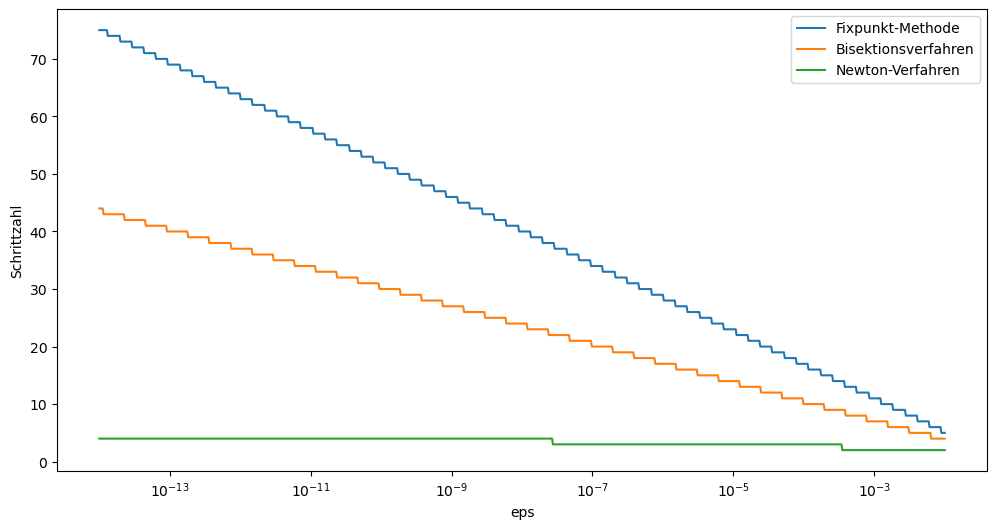

In [12]:
fig = plt.figure(figsize=(12,6))
plt.semilogx(epses,steps_fix,label="Fixpunkt-Methode")
plt.semilogx(epses,steps_bis,label="Bisektionsverfahren")
plt.semilogx(epses,steps_new,label="Newton-Verfahren")
plt.xlabel("eps")
plt.ylabel("Schrittzahl")
plt.legend()
plt.show()